# Coingecko API Notebook

This notebook demonstrates how to retrieve real-time cryptocurrency data using the [Coingecko API](https://www.coingecko.com/en/api).

We will:
- Fetch live Bitcoin price data.
- Parse and visualize trends over time.
- Optionally stream or store the data.


This notebook follows best practices outlined in [causify-ai/helpers](https://github.com/causify-ai/helpers/blob/master/docs/coding/all.jupyter_notebook.how_to_guide.md).

> Citation: Coingecko API. [https://www.coingecko.com/en/api](https://www.coingecko.com/en/api)

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

## Imports

In [2]:
import logging
# Import libraries in this section.
# Avoid imports like import *, from ... import ..., from ... import *, etc.

import requests
import time
from datetime import datetime
import pandas as pd

## Load Bitcoin data every minute 

In [6]:
import os

API_KEY = os.getenv("Coingecko_API_KEY")  # Removed trailing space
BASE_URL = "https://api.coingecko.com/api/v3"
headers = {
    "X-Cg-Pro-Api-Key": API_KEY,  # Fixed syntax: changed = to :
}

In [4]:
def get_bitcoin_price(vs_currency: str = "usd") -> float:
    """
    Fetches the current Bitcoin price in the given currency from CoinGecko.
    """
    endpoint = f"{BASE_URL}/simple/price"
    params = {"ids": "bitcoin", "vs_currencies": vs_currency}
    resp = requests.get(endpoint, params=params)
    resp.raise_for_status()
    return resp.json()["bitcoin"][vs_currency]


In [7]:
poll_interval = 60

try:
    while True:
        # 1. Current price
        price = get_bitcoin_price()
        print(f"[{datetime.now():%Y-%m-%d %H:%M:%S}] BTC price: ${price:,.2f}")

        time.sleep(poll_interval)

except KeyboardInterrupt:
    print("Monitoring stopped by user.")


[2025-04-30 23:10:26] BTC price: $94,110.00
Monitoring stopped by user.


## Get Coin’s OHLC Data with an API

In [8]:
def get_coin_ohlc(coin_id: str = "bitcoin",
                  vs_currency: str = "usd",
                  days: int = 30) -> list:
    """
    Fetches OHLC data for the specified coin over the last `days` days.
    Returns a list of [timestamp, open, high, low, close].
    """
    endpoint = f"{BASE_URL}/coins/{coin_id}/ohlc"
    params = {"vs_currency": vs_currency, "days": days}
    resp = requests.get(endpoint, params=params)
    resp.raise_for_status()
    return resp.json()

In [9]:
# 2. OHLC for last 7 days
ohlc = get_coin_ohlc(days=7)
print(f"  • Retrieved {len(ohlc)} OHLC data points for past 7 days")
df = pd.DataFrame(ohlc)
df.columns = [ "date", "open", "high", "low", "close"]
df["date"] = pd.to_datetime(df["date"], unit = "ms")
df.set_index('date', inplace = True)

# Display the dataframe with better formatting
print("\nBitcoin OHLC Data (7 days):")
display(df)

# You can also create a quick summary
print("\nSummary Statistics:")
display(df.describe())

  • Retrieved 42 OHLC data points for past 7 days

Bitcoin OHLC Data (7 days):


,open,high,low,close
date,,,,
2025-04-24 00:00:00,93534.0,93869.0,93379.0,93605.0
2025-04-24 04:00:00,93693.0,93693.0,92854.0,92854.0
2025-04-24 08:00:00,92775.0,92850.0,92194.0,92194.0
2025-04-24 12:00:00,92216.0,92612.0,91810.0,92540.0
2025-04-24 16:00:00,92619.0,93344.0,92511.0,93282.0
2025-04-24 20:00:00,93264.0,93645.0,92859.0,93645.0
2025-04-25 00:00:00,93647.0,93916.0,93266.0,93873.0
2025-04-25 04:00:00,93946.0,94182.0,93056.0,93372.0
2025-04-25 08:00:00,93340.0,93735.0,93109.0,93735.0



Summary Statistics:


,open,high,low,close
count,42.000000,42.000000,42.000000,42.000000
mean,94276.142857,94607.880952,93862.666667,94280.904762
std,747.530848,733.745959,737.956231,742.358365
min,92216.000000,92612.000000,91810.000000,92194.000000
25%,93826.250000,94209.250000,93431.500000,93860.250000
50%,94346.500000,94784.000000,93925.500000,94326.000000
75%,94778.000000,95185.250000,94504.000000,94858.500000
max,95345.000000,95564.000000,94882.000000,95352.000000


# Get Historical Bicoin Data

In [10]:
def get_historical_data(
    coin_id: str = "bitcoin",
    date_str: str = None
) -> dict:
    """
    Fetches historical data for `coin_id` on a given date (DD-MM-YYYY).
    If no date_str is provided, defaults to today.
    Returns the full JSON payload, including market_data.
    """
    if date_str is None:
        date_str = datetime.utcnow().strftime("%d-%m-%Y")

    endpoint = f"{BASE_URL}/coins/{coin_id}/history"
    params = {"date": date_str}

    headers = {}
    if API_KEY:
        # CoinGecko Pro expects this exact header name
        headers["X-Cg-Pro-Api-Key"] = API_KEY

    resp = requests.get(endpoint, params=params, headers=headers)
    resp.raise_for_status()
    return resp.json()

In [11]:
# 3. Historical snapshot (e.g., today’s date last year)
#    Example: use date_str="01-01-2025" or leave None for today
hist = get_historical_data(date_str="01-01-2025")
hist_price = hist.get("market_data", {}).get("current_price", {}).get("usd")
print(f"  • BTC price on 01-01-2025: ${hist_price:,.2f}" if hist_price else "  • No data for 01-01-2025")

  • BTC price on 01-01-2025: $93,507.86


## Fetch Cryptocurrency Bitcoin Price Data 

In [12]:
def get_market_chart(coin_id: str = "bitcoin",
                     vs_currency: str = "usd",
                     days: int = 30) -> dict:
    """
    Fetches market chart data (prices, market caps, total volumes)
    for the past `days` days.
    Returns a dict with keys: 'prices', 'market_caps', 'total_volumes'.
    """
    endpoint = f"{BASE_URL}/coins/{coin_id}/market_chart"
    params = {"vs_currency": vs_currency, "days": days}
    resp = requests.get(endpoint, params=params)
    resp.raise_for_status()
    return resp.json()

In [13]:
# 4. Market chart for past 30 days
chart = get_market_chart(days=30)
print(f"  • Market chart contains {len(chart['prices'])} price points over 30 days")

# Create a DataFrame from the chart data
# The chart data has 'prices', 'market_caps', and 'total_volumes' as keys
# Each value is a list of [timestamp, value] pairs
prices_data = [[item[0], item[1]] for item in chart['prices']]
market_caps_data = [[item[0], item[1]] for item in chart['market_caps']]
total_volumes_data = [[item[0], item[1]] for item in chart['total_volumes']]

# Create DataFrames for each metric
prices_df = pd.DataFrame(prices_data, columns=['date', 'price'])
market_caps_df = pd.DataFrame(market_caps_data, columns=['date', 'market_cap'])
total_volumes_df = pd.DataFrame(total_volumes_data, columns=['date', 'volume'])

# Convert timestamp to datetime
prices_df['date'] = pd.to_datetime(prices_df['date'], unit='ms')
market_caps_df['date'] = pd.to_datetime(market_caps_df['date'], unit='ms')
total_volumes_df['date'] = pd.to_datetime(total_volumes_df['date'], unit='ms')

# Merge the DataFrames
market_df = pd.merge(prices_df, market_caps_df, on='date')
market_df = pd.merge(market_df, total_volumes_df, on='date')

# Set date as index
market_df.set_index('date', inplace=True)

# Display latest data with date
latest_date = market_df.index[-1].strftime('%Y-%m-%d %H:%M:%S')
print(f"\nLatest Bitcoin Data (as of {latest_date}):")
print(f"Price: ${market_df['price'].iloc[-1]:,.2f}")
print(f"Market Cap: ${market_df['market_cap'].iloc[-1]:,.2f}")
print(f"24h Volume: ${market_df['volume'].iloc[-1]:,.2f}")

# Display the dataframe
market_df

  • Market chart contains 721 price points over 30 days

Latest Bitcoin Data (as of 2025-04-30 23:10:50):
Price: $94,165.97
Market Cap: $1,868,859,216,610.06
24h Volume: $27,102,902,678.39


,price,market_cap,volume
date,,,
2025-03-31 23:04:46.187,82372.424966,1.633799e+12,3.035700e+10
2025-04-01 00:02:14.101,82553.236236,1.637631e+12,2.556365e+10
2025-04-01 01:04:52.542,82632.177399,1.640439e+12,2.628107e+10
2025-04-01 02:04:44.960,82687.629211,1.641313e+12,2.561535e+10
2025-04-01 03:04:44.186,83099.713217,1.647828e+12,2.832974e+10
...,...,...,...
2025-04-30 19:07:16.214,94112.519138,1.869021e+12,2.799107e+10
2025-04-30 20:09:53.976,94243.799478,1.870339e+12,2.832275e+10
2025-04-30 21:11:53.463,94635.115803,1.880196e+12,2.868355e+10


Starting Bitcoin price monitoring (every 60 seconds)...
Press Ctrl+C to stop monitoring.
[2025-04-30 23:22:00] Bitcoin price: $94235.00

Analysis Results:
  mean_price: 94253.25
  median_price: 94252.0
  std_dev: 15.986973864159951
  min_price: 94235
  max_price: 94274
  trend: downward
  trend_slope: -11.700000000000728
  volatility: 0.00012233755812834845
  days_analyzed: 1
  data_points: 4


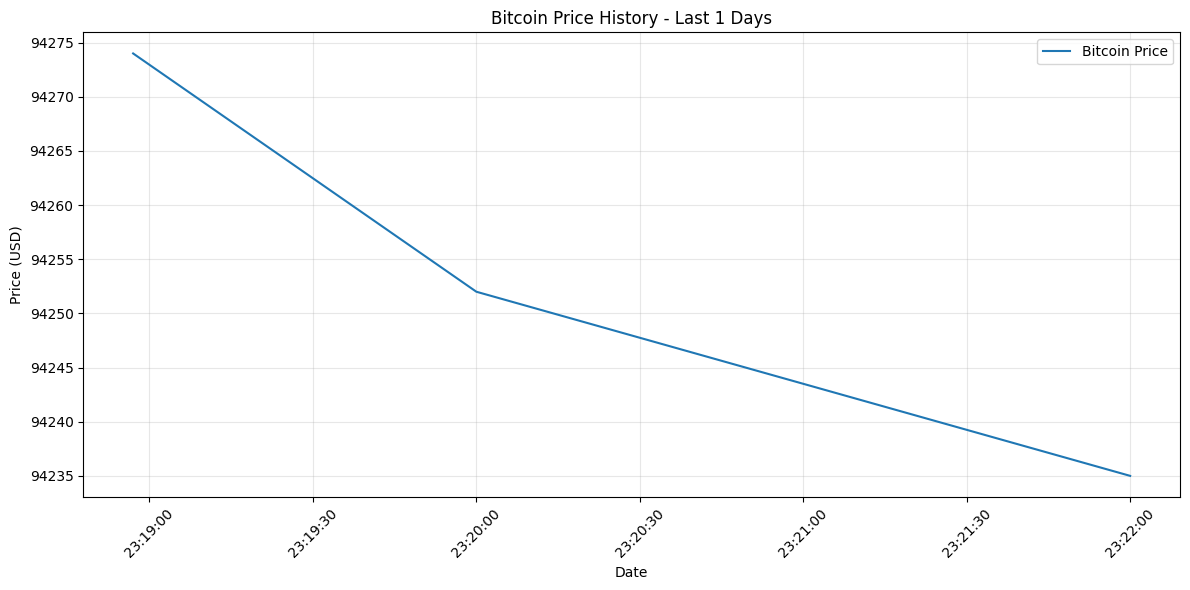

[2025-04-30 23:23:23] Bitcoin price: $94224.00

Program terminated by user.


[2025-04-30 23:24:19] Bitcoin price: $94230.00
[2025-04-30 23:25:24] Bitcoin price: $94229.00
[2025-04-30 23:25:24] Bitcoin price: $94229.00
[2025-04-30 23:26:57] Bitcoin price: $94237.00
[2025-04-30 23:27:35] Bitcoin price: $94241.00
[2025-04-30 23:28:56] Bitcoin price: $94239.00
[2025-04-30 23:30:52] Bitcoin price: $94247.00
[2025-04-30 23:30:52] Bitcoin price: $94247.00
[2025-04-30 23:31:41] Bitcoin price: $94243.00
[2025-04-30 23:32:24] Bitcoin price: $94244.00
[2025-04-30 23:34:17] Bitcoin price: $94262.00
[2025-04-30 23:35:14] Bitcoin price: $94279.00
[2025-04-30 23:36:07] Bitcoin price: $94288.00
[2025-04-30 23:36:07] Bitcoin price: $94288.00
[2025-04-30 23:37:47] Bitcoin price: $94280.00
[2025-04-30 23:39:47] Bitcoin price: $94274.00
[2025-04-30 23:40:59] Bitcoin price: $94281.00
[2025-04-30 23:41:57] Bitcoin price: $94273.00
[2025-04-30 23:42:59] Bitcoin price: $94254.00
[2025-04-30 23:43:16] Bitcoin price: $94251.00
[2025-04-30 23:43:16] Bitcoin price: $94251.00
[2025-04-30 2

In [16]:
# Bitcoin Price Monitoring System
# A project for real-time ingestion and analysis of Bitcoin price data

import requests
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import statsmodels.api as sm
from datetime import datetime, timedelta
import json
import os
from typing import Dict, List, Tuple, Optional

class BitcoinPriceMonitor:
    """
    A class for monitoring Bitcoin prices in real-time,
    performing time series analysis, and generating alerts.
    """
    
    def __init__(self, 
                 data_source: str = "coingecko", 
                 currency: str = "usd",
                 alert_threshold: float = 0.02,
                 storage_path: str = "bitcoin_data"):
        """
        Initialize the Bitcoin price monitor.
        
        Args:
            data_source: API source for Bitcoin data (default: coingecko)
            currency: Currency to track Bitcoin against (default: usd)
            alert_threshold: Percentage change to trigger alerts (default: 2%)
            storage_path: Directory to store historical data
        """
        self.data_source = data_source
        self.currency = currency
        self.alert_threshold = alert_threshold
        self.storage_path = storage_path
        
        # Create storage directory if it doesn't exist
        if not os.path.exists(storage_path):
            os.makedirs(storage_path)
            
        # Initialize data storage
        self.price_data = pd.DataFrame(columns=['timestamp', 'price'])
        
        # API endpoints
        self.api_endpoints = {
            "coingecko": f"https://api.coingecko.com/api/v3/simple/price?ids=bitcoin&vs_currencies={currency}&include_last_updated_at=true",
            "bitcoinorg": "https://api.bitcoin.org/v1/ticker"  # Placeholder - verify the actual endpoint
        }
        
    def fetch_current_price(self) -> Tuple[float, datetime]:
        """
        Fetch the current Bitcoin price from the configured API.
        
        Returns:
            Tuple of (price, timestamp)
        """
        try:
            if self.data_source == "coingecko":
                response = requests.get(self.api_endpoints["coingecko"])
                data = response.json()
                
                # Extract price and timestamp from CoinGecko response
                price = data['bitcoin'][self.currency]
                timestamp = datetime.fromtimestamp(data['bitcoin']['last_updated_at'])
                
                return price, timestamp
            
            elif self.data_source == "bitcoinorg":
                # Implementation for Bitcoin.org API
                response = requests.get(self.api_endpoints["bitcoinorg"])
                data = response.json()
                
                # Extract price and timestamp (adjust based on actual API response)
                price = data['price']
                timestamp = datetime.now()  # Use server time if API doesn't provide timestamp
                
                return price, timestamp
            
            else:
                raise ValueError(f"Unsupported data source: {self.data_source}")
                
        except Exception as e:
            print(f"Error fetching Bitcoin price: {e}")
            return None, None
    
    def update_price_data(self) -> None:
        """
        Fetch the latest price and update the stored data.
        """
        price, timestamp = self.fetch_current_price()
        
        if price is not None and timestamp is not None:
            # Add new data point
            new_data = pd.DataFrame({'timestamp': [timestamp], 'price': [price]})
            self.price_data = pd.concat([self.price_data, new_data], ignore_index=True)
            
            # Save updated data
            self.save_data()
            
            # Check for alerts
            self.check_for_alerts()
            
            print(f"[{timestamp}] Bitcoin price: ${price:.2f}")
    
    def save_data(self) -> None:
        """
        Save the current price data to disk.
        """
        filename = os.path.join(self.storage_path, "bitcoin_price_history.csv")
        self.price_data.to_csv(filename, index=False)
    
    def load_data(self) -> None:
        """
        Load historical price data from disk.
        """
        filename = os.path.join(self.storage_path, "bitcoin_price_history.csv")
        if os.path.exists(filename):
            self.price_data = pd.read_csv(filename)
            # Convert timestamp strings to datetime objects
            self.price_data['timestamp'] = pd.to_datetime(self.price_data['timestamp'])
    
    def check_for_alerts(self) -> None:
        """
        Check for significant price changes that should trigger alerts.
        """
        if len(self.price_data) < 2:
            return
        
        # Get the last two price points
        latest_price = self.price_data.iloc[-1]['price']
        previous_price = self.price_data.iloc[-2]['price']
        
        # Calculate percentage change
        percent_change = (latest_price - previous_price) / previous_price
        
        # Check if change exceeds threshold
        if abs(percent_change) >= self.alert_threshold:
            direction = "increased" if percent_change > 0 else "decreased"
            self.send_alert(f"Bitcoin price has {direction} by {abs(percent_change)*100:.2f}%! Current price: ${latest_price:.2f}")
    
    def send_alert(self, message: str) -> None:
        """
        Send an alert when a significant price change is detected.
        
        In a real implementation, this could send an email or notification.
        For this example, we'll just print to console.
        """
        print(f"ALERT: {message}")
        
        # In a real implementation, you might want to:
        # - Send an email
        # - Push a mobile notification
        # - Log to a database
        # - Call a webhook
        
        # For integration with Anthropic MCP, you would make an API call here
        # self.send_to_anthropic_mcp(message)
    
    def analyze_time_series(self, days: int = 7) -> Dict:
        """
        Perform time series analysis on the Bitcoin price data.
        
        Args:
            days: Number of days of data to analyze
            
        Returns:
            Dictionary with analysis results
        """
        # Ensure we have data loaded
        if len(self.price_data) == 0:
            self.load_data()
            
        if len(self.price_data) == 0:
            return {"error": "No data available for analysis"}
        
        # Filter to requested time period
        cutoff_date = datetime.now() - timedelta(days=days)
        recent_data = self.price_data[self.price_data['timestamp'] >= cutoff_date]
        
        if len(recent_data) < 2:
            return {"error": "Not enough data points for analysis"}
        
        # Set timestamp as index for time series analysis
        recent_data = recent_data.set_index('timestamp')
        
        # Calculate basic statistics
        mean_price = recent_data['price'].mean()
        median_price = recent_data['price'].median()
        std_dev = recent_data['price'].std()
        min_price = recent_data['price'].min()
        max_price = recent_data['price'].max()
        
        # Calculate rolling average (if we have enough data points)
        if len(recent_data) >= 5:
            recent_data['rolling_avg'] = recent_data['price'].rolling(window=5).mean()
        
        # Perform trend analysis
        model = sm.OLS(recent_data['price'], sm.add_constant(np.arange(len(recent_data)))).fit()
        slope = model.params[1]
        trend = "upward" if slope > 0 else "downward"
        
        # Volatility (standard deviation of percentage changes)
        if len(recent_data) >= 2:
            pct_changes = recent_data['price'].pct_change().dropna()
            volatility = pct_changes.std()
        else:
            volatility = 0
            
        return {
            "mean_price": mean_price,
            "median_price": median_price,
            "std_dev": std_dev,
            "min_price": min_price,
            "max_price": max_price,
            "trend": trend,
            "trend_slope": slope,
            "volatility": volatility,
            "days_analyzed": days,
            "data_points": len(recent_data)
        }
    
    def visualize_price_history(self, days: int = 7, save_path: Optional[str] = None) -> None:
        """
        Create a visualization of Bitcoin price history.
        
        Args:
            days: Number of days of data to visualize
            save_path: Path to save the visualization (if None, display only)
        """
        # Ensure we have data loaded
        if len(self.price_data) == 0:
            self.load_data()
            
        if len(self.price_data) == 0:
            print("No data available for visualization")
            return
        
        # Filter to requested time period
        cutoff_date = datetime.now() - timedelta(days=days)
        recent_data = self.price_data[self.price_data['timestamp'] >= cutoff_date].copy()
        
        if len(recent_data) < 2:
            print("Not enough data points for visualization")
            return
        
        # Calculate rolling average for visualization
        if len(recent_data) >= 5:
            recent_data['rolling_avg'] = recent_data['price'].rolling(window=5).mean()
        
        # Create figure and axis
        plt.figure(figsize=(12, 6))
        
        # Plot price
        plt.plot(recent_data['timestamp'], recent_data['price'], label='Bitcoin Price')
        
        # Plot rolling average if available
        if 'rolling_avg' in recent_data.columns:
            plt.plot(recent_data['timestamp'], recent_data['rolling_avg'], 'r--', 
                     label='5-point Moving Average')
        
        # Add labels and title
        plt.xlabel('Date')
        plt.ylabel(f'Price ({self.currency.upper()})')
        plt.title(f'Bitcoin Price History - Last {days} Days')
        plt.grid(True, alpha=0.3)
        plt.legend()
        
        # Rotate x-axis labels for better readability
        plt.xticks(rotation=45)
        
        # Adjust layout
        plt.tight_layout()
        
        # Save or show the figure
        if save_path:
            plt.savefig(save_path)
            print(f"Visualization saved to {save_path}")
        else:
            plt.show()
    
    def start_monitoring(self, interval_seconds: int = 300) -> None:
        """
        Start monitoring Bitcoin prices at regular intervals.
        
        Args:
            interval_seconds: Time between price checks in seconds (default: 5 minutes)
        """
        print(f"Starting Bitcoin price monitoring (every {interval_seconds} seconds)...")
        print(f"Press Ctrl+C to stop monitoring.")
        
        try:
            # Load any existing data
            self.load_data()
            
            # Main monitoring loop
            while True:
                # Update price data
                self.update_price_data()
                
                # Sleep until next check
                time.sleep(interval_seconds)
                
        except KeyboardInterrupt:
            print("\nMonitoring stopped by user.")
        except Exception as e:
            print(f"Error in monitoring loop: {e}")
        finally:
            # Save data before exiting
            self.save_data()
            print("Data saved. Monitoring stopped.")


def main():
    """
    Main function to demonstrate the Bitcoin Price Monitor.
    """
    # Create a monitor instance
    monitor = BitcoinPriceMonitor(
        data_source="coingecko",
        currency="usd",
        alert_threshold=0.01,  # 1% change trigger
        storage_path="bitcoin_data"
    )
    
    # Start monitoring in a separate thread or process
    import threading
    monitoring_thread = threading.Thread(
        target=monitor.start_monitoring,
        args=(60,)  # Check every minutes
    )
    monitoring_thread.daemon = True
    monitoring_thread.start()
    
    # Wait for some data to be collected
    print("Collecting initial data...")
    time.sleep(10)
    
    # Perform analysis
    analysis_results = monitor.analyze_time_series(days=1)
    print("\nAnalysis Results:")
    for key, value in analysis_results.items():
        print(f"  {key}: {value}")
    
    # Create visualization
    # monitor.visualize_price_history(days=1, save_path="bitcoin_price_history.png")
    monitor.visualize_price_history(days=1)
    
    # Keep the main thread alive
    try:
        while monitoring_thread.is_alive():
            time.sleep(1)
    except KeyboardInterrupt:
        print("\nProgram terminated by user.")
    

if __name__ == "__main__":
    main()

## The flow should be highlighted using headings in markdown
```
# Level 1
## Level 2
### Level 3
```